### ORB(Oriented Fast and Rotated BRIEF)，结合Fast与Brief算法
 - 给Fast特征点增加了方向性，使得特征点具有旋转不变性，
 - 并提出了构造金字塔方法，解决尺度不变性
 - 特征提取是由FAST（Features from Accelerated Segment Test）算法发展来的
 - 特征点描述是根据BRIEF（Binary Robust Independent Elementary Features）特征描述算法改进的
 - ORB特征是将FAST特征点的检测方法与BRIEF特征描述子结合起来
 - 并在它们原来的基础上做了改进与优化

***ORB主要解决BRIEF描述子不具备旋转不变性的问题。实验证明，ORB远优于之前的SIFT与SURF算法，ORB算法的速度是sift的100倍，是surf的10倍***

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
imgname1 = 'HE.jpg'
imgname2 = 'S1.jpg'

In [3]:
orb = cv2.ORB_create()

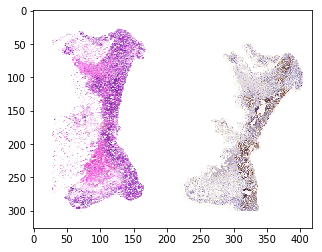

In [4]:
scaling_ratio = 50

img1 = cv2.imread(imgname1)
height1, width1, channels = img1.shape
img2 = cv2.imread(imgname2)
height2, width2, channels = img2.shape

height1_resize = int(height1/scaling_ratio)
width1_resize = int(width1/scaling_ratio)

# print(height1) # 16308
# print(height1_resize) #326


height2_resize = int(height2/scaling_ratio)
width2_resize = int(width2/scaling_ratio)

# print(height2) # 13812
# print(height2_resize) #276

height_max = max(height1_resize, height2_resize)
width_max = max(width1_resize, width2_resize )

# print(height_max) # 326

height1_resize_add_pad = int((height_max - height1_resize)/2)
width1_resize_add_pad = int((width_max - width1_resize)/2)

height2_resize_add_pad = int((height_max - height2_resize)/2)
width2_resize_add_pad = int((width_max - width2_resize)/2)


img1 = cv2.resize(img1, (width1_resize,height1_resize))
img2 = cv2.resize(img2, (width2_resize,height2_resize))


color = [255, 255, 255]
image1 = cv2.copyMakeBorder(img1, height1_resize_add_pad, height1_resize_add_pad, width1_resize_add_pad, width1_resize_add_pad,cv2.BORDER_CONSTANT, value = color)
image2 = cv2.copyMakeBorder(img2, height2_resize_add_pad, height2_resize_add_pad, width2_resize_add_pad, width2_resize_add_pad,cv2.BORDER_CONSTANT, value = color)
image1 = cv2.resize(image1, (width_max,height_max))
image1 = cv2.resize(image1, (width_max,height_max))
height1, width1, channels = image1.shape
height2, width2, channels = image2.shape


hmerge = np.hstack((image1, image2)) #水平拼接
plt.imshow(hmerge,cmap='gray')#拼接显示为gray
plt.show()

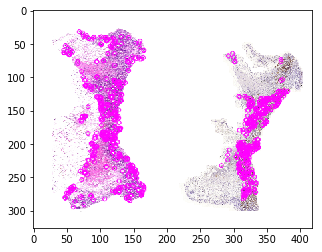

In [5]:
kp1, des1 = orb.detectAndCompute(image1,None)#des是描述子
kp2, des2 = orb.detectAndCompute(image2,None)
img3 = cv2.drawKeypoints(image1,kp1,image1,color=(255,0,255))
img4 = cv2.drawKeypoints(image2,kp2,image2,color=(255,0,255))

hmerge = np.hstack((img3, img4)) #水平拼接
plt.imshow(hmerge)#拼接显示为gray
plt.show()

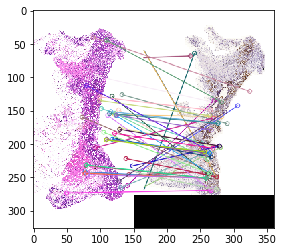

In [7]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.85*n.distance:
        good.append([m])
        
img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(img5)#拼接显示为gray
plt.show()